

# Project: Investigate TMDB Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction
### The dataset,
 First of all ,This TMdb dataset from kaggle.com is about movies with its data such as movie's id, revenue and runtime, i find that so intresting to explore and analyze it. 
 ### Questions,
 In this project i wil discuse some question that i realy curiouse about. My questions espects are about the released year, movies runtime and votes.I will use some of python libraries to help me to find the answers and make this processing more easier.
 The questions are :
 (through each year exist in this dataset, how many movies were released yearly? 
 What is the percentage of the long runtime and short runtime movies?
 Is the RunTime effects the votes?)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### Dataset load and overview

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(3)


id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline  ...  \
0           The park is open.  ...   
1          What a Lovely Day.  ...   
2  One Choice Can Destroy You  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  

[3 rows x 21 columns]

Simple view of the dataset contents

In [3]:
df.shape

(10866, 21)

Obviously we have 10866 rows and 21 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Most of these columns are non-null values, release_date column has string type which is wrong.

In [5]:
df.describe(include='all')

id    imdb_id    popularity        budget       revenue  \
count    10866.000000      10856  10866.000000  1.086600e+04  1.086600e+04   
unique            NaN      10855           NaN           NaN           NaN   
top               NaN  tt0411951           NaN           NaN           NaN   
freq              NaN          2           NaN           NaN           NaN   
mean     66064.177434        NaN      0.646441  1.462570e+07  3.982332e+07   
std      92130.136561        NaN      1.000185  3.091321e+07  1.170035e+08   
min          5.000000        NaN      0.000065  0.000000e+00  0.000000e+00   
25%      10596.250000        NaN      0.207583  0.000000e+00  0.000000e+00   
50%      20669.000000        NaN      0.383856  0.000000e+00  0.000000e+00   
75%      75610.000000        NaN      0.713817  1.500000e+07  2.400000e+07   
max     417859.000000        NaN     32.985763  4.250000e+08  2.781506e+09   

       original_title        cast                           homepage  \
count           10866       10790                               2936   
unique          10571       10719                               2896   
top            Hamlet  Louis C.K.  http://www.missionimpossible.com/   
freq                4           6                                  4   
mean              NaN         NaN                                NaN   
std               NaN         NaN                                NaN   
min               NaN         NaN                                NaN   
25%               NaN         NaN                                NaN   
50%               NaN         NaN                                NaN   
75%               NaN         NaN                                NaN   
max               NaN         NaN                                NaN   

           director                 tagline  ...            overview  \
count         10822                    8042  ...               10862   
unique         5067                    7997  ...               10847   
top     Woody Allen  Based on a true story.  ...  No overview found.   
freq             45                       5  ...                  13   
mean            NaN                     NaN  ...                 NaN   
std             NaN                     NaN  ...                 NaN   
min             NaN                     NaN  ...                 NaN   
25%             NaN                     NaN  ...                 NaN   
50%             NaN                     NaN  ...                 NaN   
75%             NaN                     NaN  ...                 NaN   
max             NaN                     NaN  ...                 NaN   

             runtime  genres production_companies release_date    vote_count  \
count   10866.000000   10843                 9836        10866  10866.000000   
unique           NaN    2039                 7445         5909           NaN   
top              NaN  Comedy   Paramount Pictures       1/1/09           NaN   
freq             NaN     712                  156           28           NaN   
mean      102.070863     NaN                  NaN          NaN    217.389748   
std        31.381405     NaN                  NaN          NaN    575.619058   
min         0.000000     NaN                  NaN          NaN     10.000000   
25%        90.000000     NaN                  NaN          NaN     17.000000   
50%        99.000000     NaN                  NaN          NaN     38.000000   
75%       111.000000     NaN                  NaN          NaN    145.750000   
max       900.000000     NaN                  NaN          NaN   9767.000000   

        vote_average  release_year    budget_adj   revenue_adj  
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean        5.974922   2001.322658  1.755104e+07  5.136436e+07  
s

Runtime minimum value is 0 and the maximum value is 900, the released years are started from 1960 to 2015

# Data cleaning

### Dropping unrelative columns

In [6]:
df= df.drop(columns= ['homepage', 'imdb_id','keywords','cast','revenue_adj','budget_adj','tagline'])

### Columns types

In [7]:
df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

The release_date column has a string type, so i'll fix that here bellow to be a datetime.

In [8]:
df['release_date']= pd.to_datetime(df['release_date'])

### Unrealistic rows

 Removing some rows that does not realistic,i'll need that later for my analysis. rows with  runtime that have more than 180 mins and  runtime that have less than 40 mins. and first i have to make sure that this rows are not exceed 10% of the total rows, so i will count how many rows that contain the unrealistic value.

In [9]:
sum(df.runtime>180)

128

In [10]:
sum(df.runtime<40)

250

They did not exceed 10% of the total rows. So dropping them

In [11]:
df=df.drop(df[(df.runtime<40)&(df.runtime>180)].index)

### Duplicate rows

checking for duplicated rows

In [12]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [13]:
sum(df.duplicated())

1

There is one row that is duplicated, so i'll remove it

In [14]:
df.drop_duplicates(inplace=True)
df.shape

(10865, 14)

<a id='eda'></a>
## Exploratory Data Analysis

### Exploring the number of movies yearly. Research Question 1 

1-through each year exist in this dataset, how many movies were released yearly?  

i need to count how many movies released each year using (group by)

In [15]:
tmp = df.groupby(by='release_year').count()
tmp.head()
tmp.reset_index()

release_year   id  popularity  budget  revenue  original_title  director  \
0           1960   32          32      32       32              32        32   
1           1961   31          31      31       31              31        31   
2           1962   32          32      32       32              32        32   
3           1963   34          34      34       34              34        34   
4           1964   42          42      42       42              42        42   
5           1965   35          35      35       35              35        35   
6           1966   46          46      46       46              46        46   
7           1967   40          40      40       40              40        39   
8           1968   39          39      39       39              39        39   
9           1969   31          31      31       31              31        31   
10          1970   41          41      41       41              41        41   
11          1971   55          55      55       55              55        55   
12          1972   40          40      40       40              40        40   
13          1973   55          55      55       55              55        55   
14          1974   47          47      47       47              47        47   
15          1975   44          44      44       44              44        44   
16          1976   47          47      47       47              47        47   
17          1977   57          57      57       57              57        57   
18          1978   65          65      65       65              65        65   
19          1979   57          57      57       57              57        57   
20          1980   78          78      78       78              78        78   
21          1981   82          82      82       82              82        82   
22          1982   81          81      81       81              81        81   
23          1983   80          80      80       80              80        80   
24          1984  105         105     105      105             105       105   
25          1985  109         109     109      109             109       108   
26          1986  121         121     121      121             121       121   
27          1987  125         125     125      125             125       125   
28          1988  145         145     145      145             145       144   
29          1989  137         137     137      137             137       137   
30          1990  132         132     132      132             132       132   
31          1991  133         133     133      133             133       133   
32          1992  133         133     133      133             133       133   
33          1993  178         178     178      178             178       177   
34          1994  184         184     184      184             184       184   
35          1995  175         175     175      175             175       175   
36          1996  204         204     204      204             204       204   
37          1997  192         192     192      192             192       191   
38          1998  210         210     210      210             210       210   
39          1999  224         224     224      224             224       224   
40          2000  227         227     227      227             227       227   
41          2001  242         242     242      242             242       242   
42          2002  266         266     266      266             266       266   
43          2003  281         281     281      281             281       281   
44          2004  307         307     307      307             307       307   
45          2005  364         364     364      364             364       364   
46          2006  408         408     408      408             408       408   
47          2007  438         438     438      438             438       435   
48          2008  496         496     496      496             496       489   
49  

We have 56 years from 1960 to 2015, and the id column represents the number of movies each year.

I think is better to change the name of id column to NumberOfMovies to be more precise answer

In [16]:
tmp = tmp.rename(columns={'id': 'NumberOfMovies'})

Creating a figure to clarify the findings

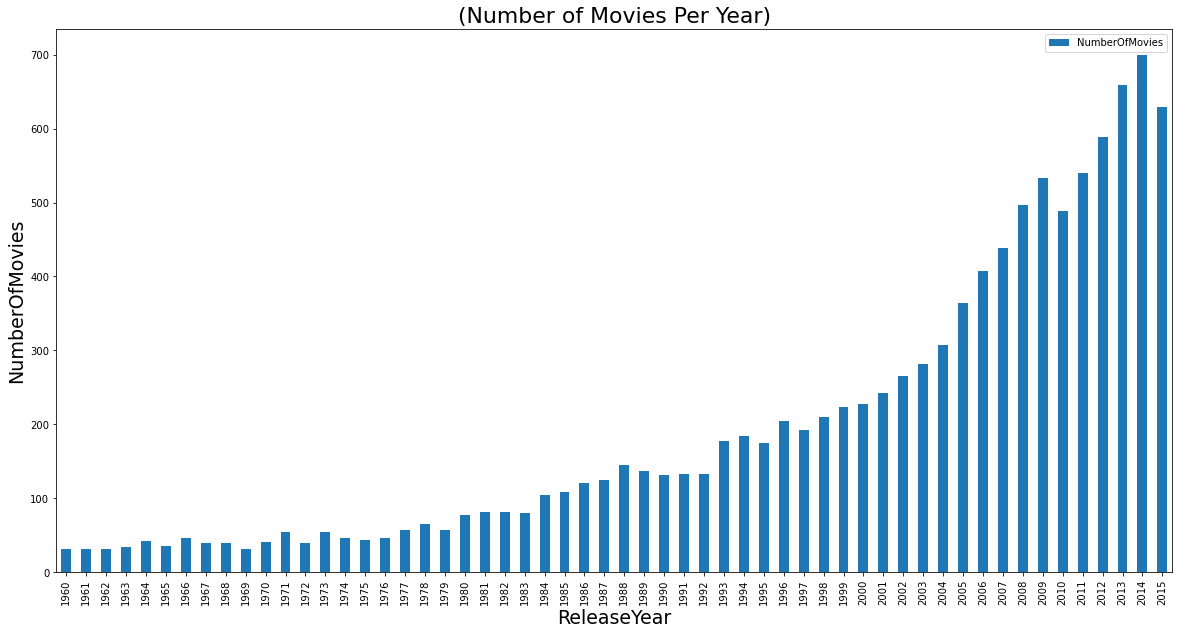

In [17]:
plt.figure
tmp.plot.bar(y='NumberOfMovies',figsize=(20,10))
plt.xlabel('ReleaseYear', fontsize=19)
plt.ylabel('NumberOfMovies', fontsize=19)
plt.title("(Number of Movies Per Year)",fontsize=22);

Description of this figure:
The maximum number of movies that released in an only year is 700 movies and 2014 had that biggest number of movies than other years. Also, movies were getting increased,and the most released movies were in the recently years and that started from the year of 2005 probably.on the other hand, from 1960 to 1983 movies were under 100 movies yearly.

### Runtime and it's effects. Research Question 2  

1-What is the percentage of the long runtime and short runtime movies?

i have to create 2 new columns first (LongRunTime, ShortRunTime) that shows the kind of runtime long or short, long it's mean movie's runtime is more than 89 mins and short is less than 90 mins

In [18]:
df['LongRunTime']=df.runtime>89

In [19]:
df['ShortRunTime']=df.runtime<90

In [20]:
df.head(200)

id  popularity     budget     revenue                original_title  \
0    135397   32.985763  150000000  1513528810                Jurassic World   
1     76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2    262500   13.112507  110000000   295238201                     Insurgent   
3    140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    168259    9.335014  190000000  1506249360                     Furious 7   
..      ...         ...        ...         ...                           ...   
195  331781    0.738404          0     8413144                           Amy   
196  253161    0.729900          0           0                 Madame Bovary   
197  312831    0.719407          0           0                    The Hallow   
198  316322    0.714131          0           0      Barbie in Princess Power   
199  301846    0.707355          0           0                          Howl   

             director                                           overview  \
0     Colin Trevorrow  Twenty-two years after the events of Jurassic ...   
1       George Miller  An apocalyptic story set in the furthest reach...   
2    Robert Schwentke  Beatrice Prior must confront her inner demons ...   
3         J.J. Abrams  Thirty years after defeating the Galactic Empi...   
4           James Wan  Deckard Shaw seeks revenge against Dominic Tor...   
..                ...                                                ...   
195      Asif Kapadia  A documentary on the life of Amy Winehouse, th...   
196    Sophie Barthes  The classic story of Emma Bovary, the beautifu...   
197       Corin Hardy  A family who moved into a remote mill house in...   
198       Zeke Norton  Barbie is Kara - a modern-day princess with a ...   
199        Paul Hyett  When passengers on a train are attacked by a c...   

     runtime                                     genres  \
0        124  Action|Adventure|Science Fiction|Thriller   
1        120  Action|Adventure|Science Fiction|Thriller   
2        119         Adventure|Science Fiction|Thriller   
3        136   Action|Adventure|Science Fiction|Fantasy   
4        137                      Action|Crime|Thriller   
..       ...                                        ...   
195      128                          Documentary|Music   
196      118                                      Drama   
197       97                             Fantasy|Horror   
198       74                           Family|Animation   
199       89                                     Horror   

                                  production_companies release_date  \
0    Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
1    Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13   
2    Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18   
3            Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15   
4    Universal Pictures|Original Film|Media Rights ...   2015-04-01   
..                                                 ...          ...   
195                On The Corner Films|Universal Music   2015-07-03   
196  A Company Filmproduktionsgesellschaft|Aleph Mo...   2015-06-04   
197  Prescience|Bord Scannan na hEireann / Irish Fi...   2015-11-06   
198                      Mattel Playground Productions   2015-01-29   
199                                 Starchild Pictures   2015-10-01   

     vote_count  vote_average  release_year  LongRunTime  ShortRunTime  
0          5562           6.5          2015         True         False  
1          6185           7.1          2015         True         False  
2          2480           6.3          2015         True         False  
3          5292           7.5          2015         True         False  
4          2947           7.3          2015         True         False  
..          ...           ...           ...          ...           ...  
195         345           7.5          2015         True      

The new columns are added, and now i create the figure bu using LongRunTime column.

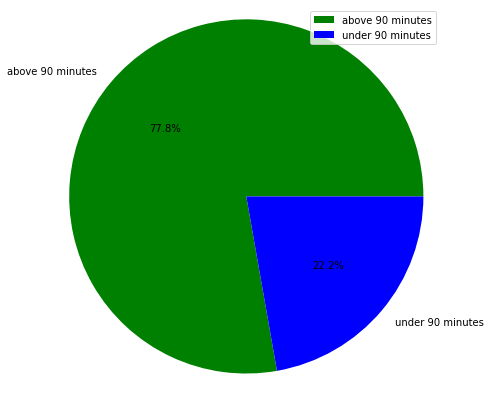

In [21]:
PP = df['LongRunTime'].value_counts()
labels=['above 90 minutes','under 90 minutes']
explode=(0,0)
colors=('green','blue')
fig, ax =plt.subplots(figsize=(7,7))
plt.pie(PP, labels=labels ,colors=colors, explode=explode , autopct='%1.1f%%')
ax.axis('equal')
plt.legend()
plt.show();


 Discription of this figure: By using LongRunTime column, i got the percentage, long runtime movies is more than the short ones by 77.8%.

2-Is the RunTime effects the votes? such as if the movie's runtime is long people get boring or people are more like the short ones?

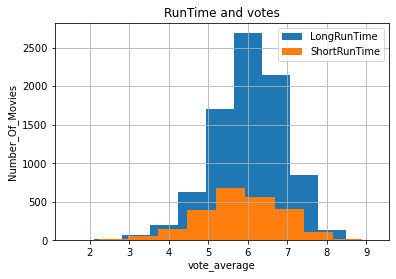

In [22]:
LongRunTime= df.runtime>89
ShortRunTime= df.runtime<90
df.vote_average[LongRunTime].hist(label='LongRunTime')
df.vote_average[ShortRunTime].hist(label='ShortRunTime')
plt.xlabel('vote_average')
plt.ylabel('Number_Of_Movies')
plt.title("RunTime and votes")
plt.legend();

Description of this figure: the y axis is represent the number of movies and the x axis is represent the vote average, so finding out long movies have most vote averag 6 and the short movies have most vote average 5.5.

<a id='conclusions'></a>
# Conclusions
Along with the rapid,i found out the most of the movies has vote average between 5 and 7 and it has a long rintime. And there is a big difrence in number of movies that are released in the recently years than the old years.

However, i took a help from stackoverflow.com and Udacity as well.
##  Limitations
I would say that at the beginig i got some questions on the most importent variables which are revenue and budget to analyze it, but unfortunately thay are contain zeros values and it takes more than 10% of the total number of rows,and i didnt use them in my analysis, that why i excluded them . 

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1